# **Webscraping Led Zeppelin's Concert History with Selenium**

For scientific purposes only. 

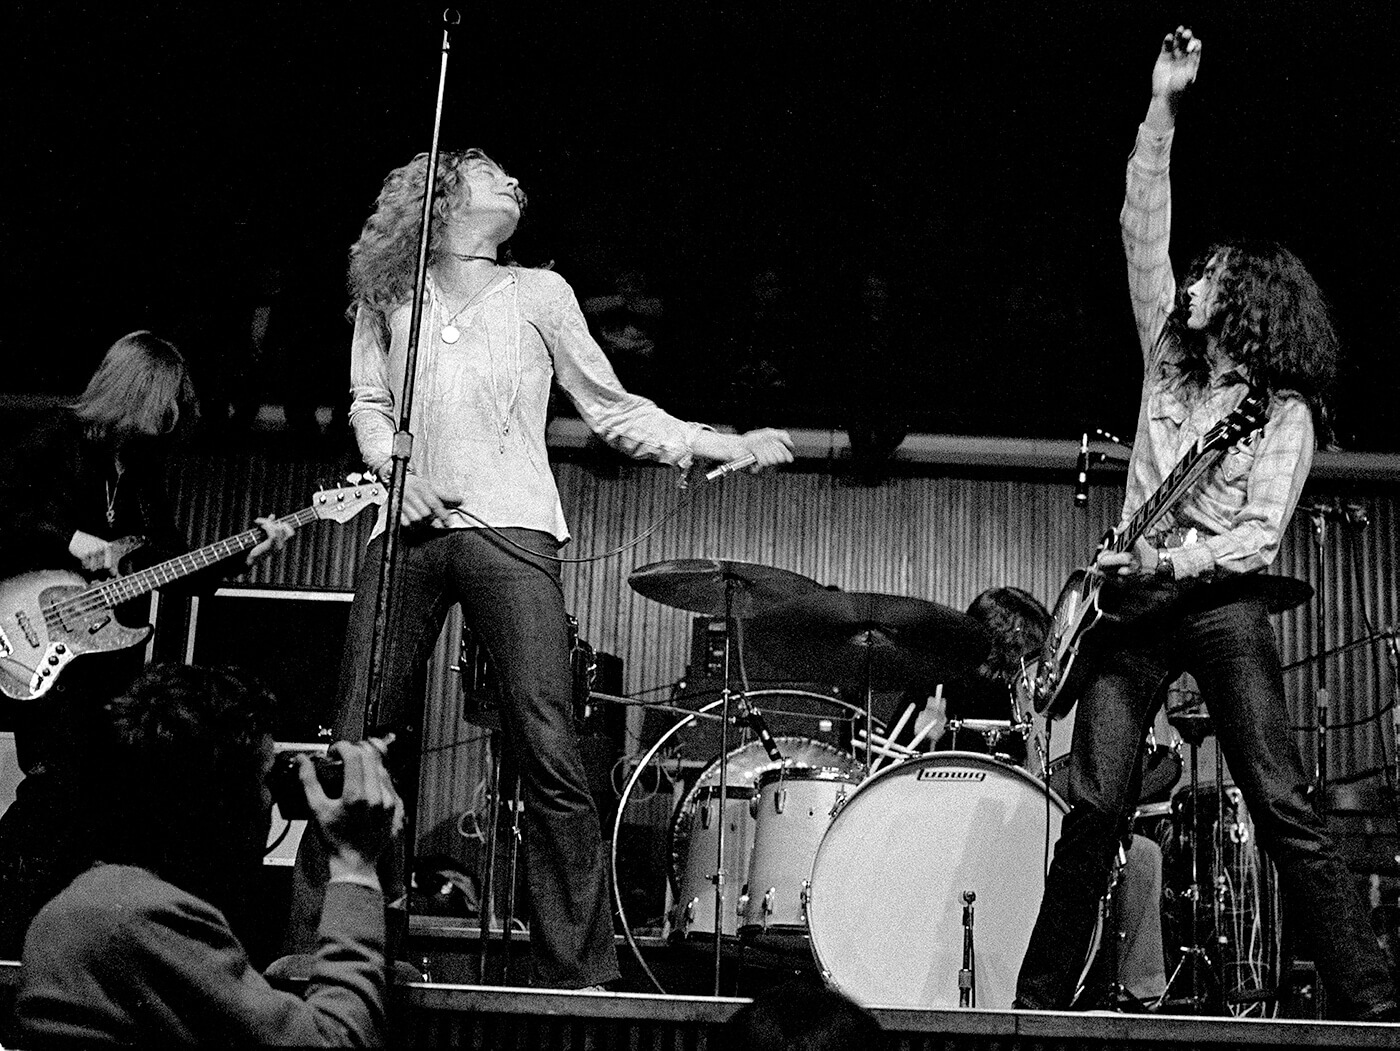

In [6]:
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import string
from datetime import date
from datetime import datetime
import geopandas
import matplotlib.pyplot as plt

In [7]:
def driverCreate():
    
    #### created a driver function to put it in many other functions ######
    
    s = Service(r"C:\Users\Topcu\.wdm\drivers\chromedriver\win32\108.0.5359\chromedriver.exe")
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_experimental_option("useAutomationExtension", False)
    chrome_options.add_experimental_option("excludeSwitches",["enable-automation"])
    driver = webdriver.Chrome(options=chrome_options,service=s)
    driver.implicitly_wait(10)
    return driver 

In [2]:
def zep_scrap(url):
    
    ###### scrapes date and venue names and stores them in dataframe #####
    
    url = url
    print(f"Getting concerts in: {url}")
    
    driver=driverCreate()
    driver.get(url)
    #this particular site had a cookie so i'm clicking on it
    cookie = driver.find_element('xpath','//button[@id="onetrust-accept-btn-handler"]')
    try:
        cookie.click()
        time.sleep(5)
    except:
        pass
    dates = []
    venues =[]
    urls = []
    entry_items_list = driver.find_elements('xpath', '/html/body/div[1]/div/div/div[2]/div/div[1]/div/main/section/div/div[2]/div/div/div/div')[0]
    
    for i in entry_items_list.find_elements('xpath', "//span[@class='field-content']"): #dates xpath
        dates.append(i.text)
    for i in entry_items_list.find_elements('xpath', "//div[@class='field-content']"): #venues xpath
        venues.append(i.text)
    url = driver.find_elements('xpath', "//div[@class='field-content']/a[1]")
    for href in url:
        urls.append(href.get_attribute("href"))
    
    df = pd.DataFrame(columns = ["Date", "Venue","URL"])
    dates = pd.Series(dates, name='Date')
    venues = pd.Series(venues, name='Venue')
    urls = pd.Series(urls, name="URL")
    df = df.append(pd.concat([dates,venues,urls], axis=1))

    return df

In [3]:
def scrape(url):
    
    ##### moves between pages in the form of url + "?page=" + page number and total count less than 21 #######
    
    url = url + "?page="
    df = pd.DataFrame(columns = ["Date", "Venue","URL"])
    i = 0
    while i<21:
        try:
            df = df.append(zep_scrap(url + str(i)))
            print(f"Page: {i+1}")
            i += 1
            time.sleep(30)
        except:
            break
    
    df = df.reset_index(drop=True)
    df.to_csv(r"C:\Users\Topcu\Desktop\zep-scrape\zep-final.csv")
    return df

In [4]:
scrape("https://www.ledzeppelin.com/shows/all")

Getting concerts in: https://www.ledzeppelin.com/shows/all?page=0


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 1
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=1


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 2
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=2


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 3
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=3


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 4
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=4


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 5
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=5


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 6
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=6


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 7
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=7


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 8
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=8


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 9
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=9


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 10
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=10


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 11
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=11


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 12
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=12


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 13
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=13


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 14
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=14


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 15
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=15


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 16
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=16


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 17
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=17


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 18
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=18


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 19
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=19


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 20
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=20


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.concat([dates,venues,urls], axis=1))
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3588157229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(zep_scrap(url + str(i)))


Page: 21
Getting concerts in: https://www.ledzeppelin.com/shows/all?page=21


C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:35: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates = pd.Series(dates, name='Date')
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:36: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  venues = pd.Series(venues, name='Venue')
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  urls = pd.Series(urls, name="URL")
C:\Users\Topcu\AppData\Local\Temp\ipykernel_16212\3231055312.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

Page: 22


,Date,Venue,URL
0,"September 7, 1968","Teen-Clubs, Box 45, Egegaard Skole",https://www.ledzeppelin.com/show/teen-clubs-bo...
1,"September 7, 1968","Brondby Pop-Club, Norregardsskolen",https://www.ledzeppelin.com/show/brondby-pop-c...
2,"September 8, 1968",Reventlowparken,https://www.ledzeppelin.com/show/reventlowpark...
3,"September 8, 1968",Fjordvilla Club,https://www.ledzeppelin.com/show/fjordvilla-cl...
4,"September 8, 1968",Teaterbygningen,https://www.ledzeppelin.com/show/teaterbygning...
...,...,...,...
513,"July 2, 1980",Eisstadion,https://www.ledzeppelin.com/show/eisstadion-ju...
514,"July 3, 1980",Eisstadion,https://www.ledzeppelin.com/show/eisstadion-ju...
515,"July 5, 1980",Olympia Halle,https://www.ledzeppelin.com/show/olympia-halle...
516,"July 7, 1980",Eissporthalle,https://www.ledzeppelin.com/show/eissporthalle...


In [14]:
df = pd.read_csv(r"C:\Users\Topcu\Desktop\zep-scrape\zep-final.csv")
df.shape

(518, 4)

In [15]:
def getSetlistNote(df):  
    
###### gets setlists, notes and reviews looping through the scraped URLs and concatenates the new df with the previous #####
###### only scraped 20 urls due to time constraints ######

    notes = []
    setlists = []
    for i, url in enumerate(df["URL"][0:20]):
        start_time = time.time()
        driver = driverCreate()
        driver.get(url)
        cookie = driver.find_element('xpath','//button[@id="onetrust-accept-btn-handler"]')
        try:
            cookie.click()
        except:
            pass
        
        driver.implicitly_wait(10) 
        try:
            readMore = driver.find_element('xpath', "//*[@id='block-acq-starterm-copy-2-system-main']/div/article/div/div[8]/a")
            readMore.click()
        except:
            pass
        time.sleep(10)
        
        try:
            note = driver.find_elements('xpath', "//*[@class= 'clearfix text-formatted field field--name-body field--type-text-with-summary field--label-above']")
            for n in note:
                notes.append(n.text)
        except:
            pass
        try:
            setlist = driver.find_element('xpath', '//*[@class= "field__item"]/p[1]')
            setlists.append(setlist.text)
        except:
            pass
        end_time = time.time()
    
        print(f"Scraped setlist and notes in: {url} {i}/50 in {end_time - start_time} seconds.")

    data = pd.DataFrame(columns = ["Setlist", "Notes"])

    notes = pd.Series(notes, name='Notes')
    setlists = pd.Series(setlists, name='Setlist')
    data = pd.concat([setlists,notes], ignore_index=True, axis=1)
    data.rename(columns={0: 'Setlist', 1: 'Notes'}, inplace=True)
    
    df = pd.concat([df, data], axis=1)
    df = df.to_csv(r"C:\Users\Topcu\Desktop\zep-scrape\zep-latest.csv", index=False)
    return df 

In [16]:
getSetlistNote(df)

Scraped setlist and notes in: https://www.ledzeppelin.com/show/teen-clubs-box-45-egegaard-skole-september-7-1968 0/50 in 14.562761306762695 seconds.
Scraped setlist and notes in: https://www.ledzeppelin.com/show/brondby-pop-club-norregardsskolen-september-7-1968 1/50 in 16.217131853103638 seconds.
Scraped setlist and notes in: https://www.ledzeppelin.com/show/reventlowparken-september-8-1968 2/50 in 23.2737717628479 seconds.
Scraped setlist and notes in: https://www.ledzeppelin.com/show/fjordvilla-club-september-8-1968 3/50 in 19.320987462997437 seconds.
Scraped setlist and notes in: https://www.ledzeppelin.com/show/teaterbygningen-september-8-1968 4/50 in 24.895912647247314 seconds.
Scraped setlist and notes in: https://www.ledzeppelin.com/show/stora-scenen-september-12-1968 5/50 in 26.201844930648804 seconds.
Scraped setlist and notes in: https://www.ledzeppelin.com/show/inside-club-september-13-1968 6/50 in 21.50434446334839 seconds.
Scraped setlist and notes in: https://www.ledzepp

In [17]:
df = pd.read_csv(r"C:\Users\Topcu\Desktop\zep-scrape\zep-latest.csv")
df.head()
#three shows a day!

,Unnamed: 0,Date,Venue,URL,Setlist,Notes
0,0,"September 7, 1968","Teen-Clubs, Box 45, Egegaard Skole",https://www.ledzeppelin.com/show/teen-clubs-bo...,Setlists during these early shows include: Tra...,"Notes\nFirst ever concert by the group, who ar..."
1,1,"September 7, 1968","Brondby Pop-Club, Norregardsskolen",https://www.ledzeppelin.com/show/brondby-pop-c...,Setlists during these early tours include: Tra...,"Notes\nTicketprice 4-8 DKR, Show at 19:30\nBil..."
2,2,"September 8, 1968",Reventlowparken,https://www.ledzeppelin.com/show/reventlowpark...,Setlists during these early tours include: Tra...,Notes\nEvening show\n* Advertised as Yard-Bird...
3,3,"September 8, 1968",Fjordvilla Club,https://www.ledzeppelin.com/show/fjordvilla-cl...,Setlists during this period included: Train Ke...,Notes\nAfternoon show\n* Advertised as Yardbir...
4,4,"September 8, 1968",Teaterbygningen,https://www.ledzeppelin.com/show/teaterbygning...,NaN,"Notes\nNew third show on this date uncovered, ..."


In [18]:
#changing date column to datetime
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Unnamed: 0,Date,Venue,URL,Setlist,Notes
0,0,1968-09-07,"Teen-Clubs, Box 45, Egegaard Skole",https://www.ledzeppelin.com/show/teen-clubs-bo...,Setlists during these early shows include: Tra...,"Notes\nFirst ever concert by the group, who ar..."
1,1,1968-09-07,"Brondby Pop-Club, Norregardsskolen",https://www.ledzeppelin.com/show/brondby-pop-c...,Setlists during these early tours include: Tra...,"Notes\nTicketprice 4-8 DKR, Show at 19:30\nBil..."
2,2,1968-09-08,Reventlowparken,https://www.ledzeppelin.com/show/reventlowpark...,Setlists during these early tours include: Tra...,Notes\nEvening show\n* Advertised as Yard-Bird...
3,3,1968-09-08,Fjordvilla Club,https://www.ledzeppelin.com/show/fjordvilla-cl...,Setlists during this period included: Train Ke...,Notes\nAfternoon show\n* Advertised as Yardbir...
4,4,1968-09-08,Teaterbygningen,https://www.ledzeppelin.com/show/teaterbygning...,NaN,"Notes\nNew third show on this date uncovered, ..."


In [64]:
import geocoder
import requests

In [65]:
with requests.Session() as session:
    for address in df["Venue"]:
        coo = geocoder.osm(address, session=session)
        if coo:
            df.loc[df["Venue"] == address, "Long"] = round(coo.osm["x"], 2)
            df.loc[df["Venue"] == address, "Lat"] = round(coo.osm["y"], 2)

print(df)

     Unnamed: 0       Date                               Venue  \
0             0 1968-09-07  Teen-Clubs, Box 45, Egegaard Skole   
1             1 1968-09-07  Brondby Pop-Club, Norregardsskolen   
2             2 1968-09-08                     Reventlowparken   
3             3 1968-09-08                     Fjordvilla Club   
4             4 1968-09-08                     Teaterbygningen   
..          ...        ...                                 ...   
513         513 1980-07-02                          Eisstadion   
514         514 1980-07-03                          Eisstadion   
515         515 1980-07-05                       Olympia Halle   
516         516 1980-07-07                       Eissporthalle   
517         517 2007-12-10                        The O2 Arena   

                                                   URL   Long    Lat  
0    https://www.ledzeppelin.com/show/teen-clubs-bo...    NaN    NaN  
1    https://www.ledzeppelin.com/show/brondby-pop-c...    NaN    

In [67]:
point = df.copy()
point.dropna(inplace=True)

In [93]:
#135 concert's geopoints couldn't be identified by the geocoder
point.shape

(383, 8)

In [68]:
#created points for each concert to map them 
gdf = geopandas.GeoDataFrame(point, geometry=geopandas.points_from_xy(point.Long, point.Lat))

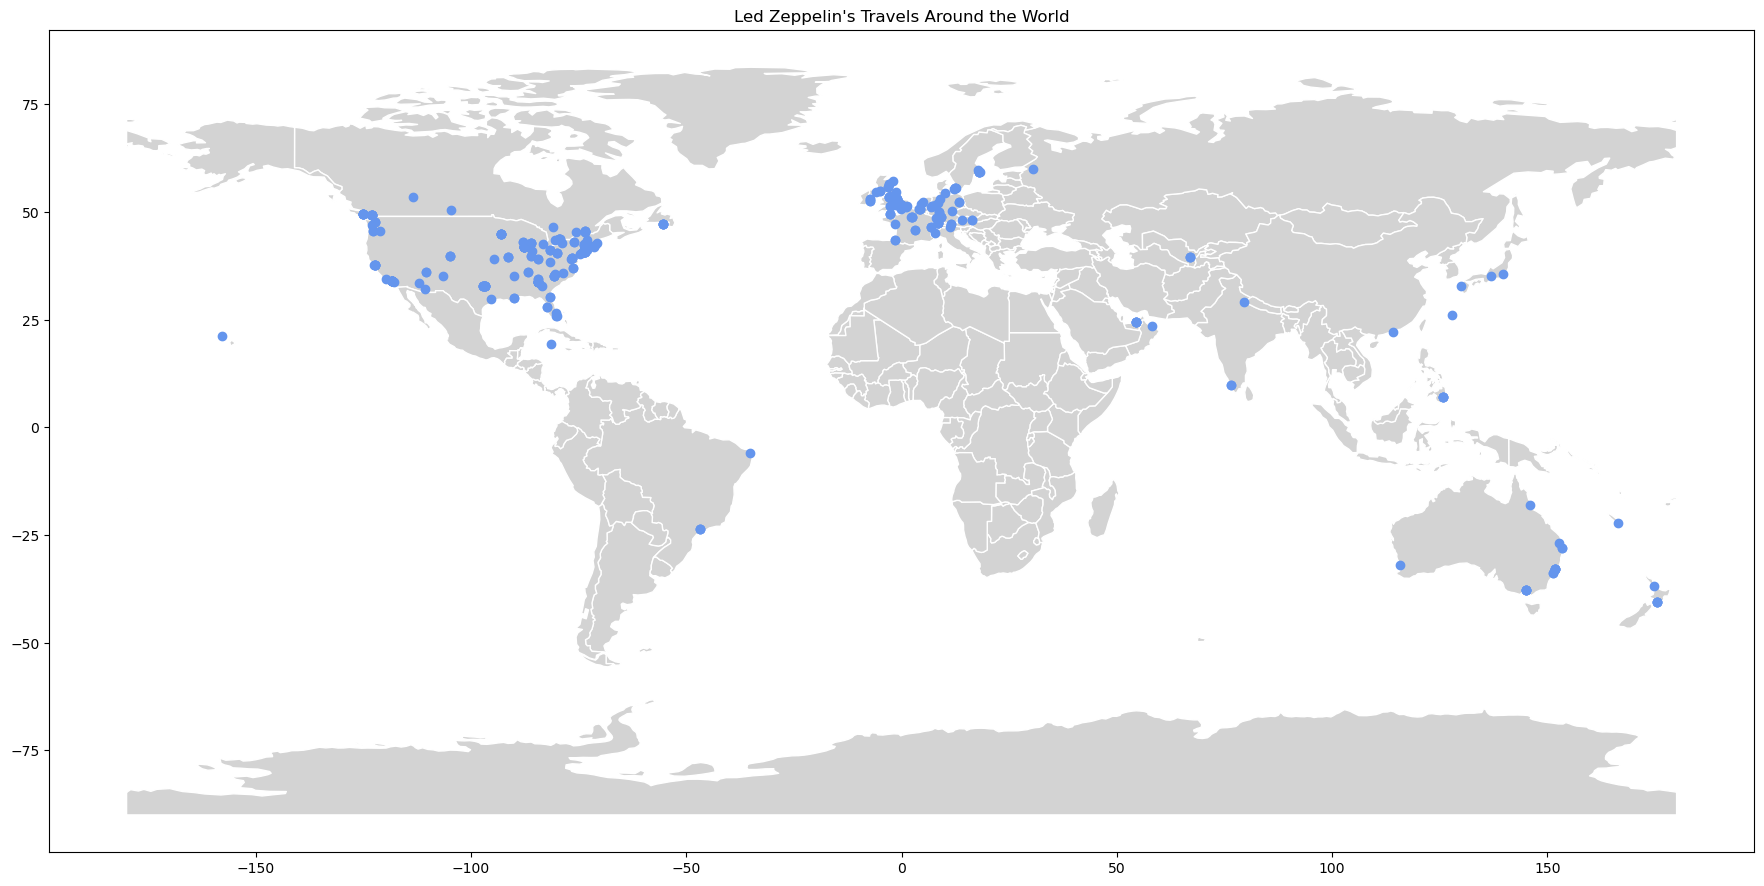

In [69]:
#wow! we had many na values for the geometric points but still, they've been around!
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='white',figsize=(22,22))
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='cornflowerblue')
plt.title("Led Zeppelin's Travels Around the World")
plt.show()